<a href="https://colab.research.google.com/github/XaviPat01/MTL782_Data_Mining/blob/main/MTL782_Assignment1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MTL782: Assignment 1, Question 1**
Members:
- Saurabh Jha, 2020MT10845
- Vishvesh Patel, 2020MT60896
- Avi Patni, 2020MT60159

We have chosen the _____ dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.axes import Axes
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.metrics import pairwise_distances, DistanceMetric
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

## Loading the Dataset

Given a chapter(word frequency vector), predict the book from where it's taken

In [ ]:
dataset = pd.read_csv(filepath_or_buffer="/content/AllBooks_baseline_DTM_Labelled.csv")
print(dataset.head(10))
print(dataset.shape)

      Unnamed: 0  foolishness  hath  wholesome  takest  feelings  anger  \
0   Buddhism_Ch1            0     0          0       0         0      0   
1   Buddhism_Ch2            0     0          0       0         0      0   
2   Buddhism_Ch3            0     0          0       0         0      0   
3   Buddhism_Ch4            0     0          0       0         0      0   
4   Buddhism_Ch5            0     0          0       0         0      0   
5   Buddhism_Ch6            0     0          0       0         0      0   
6   Buddhism_Ch7            0     0          0       0         0      0   
7   Buddhism_Ch8            0     0          0       0         0      0   
8   Buddhism_Ch9            0     0          0       0         0      0   
9  Buddhism_Ch10            0     0          0       0         0      0   

   vaivaswata  matrix  kindled  ...  erred  thinkest  modern  reigned  \
0           0       0        0  ...      0         0       0        0   
1           0       0       

In [ ]:
dataset.insert(0,'book_name','')
book_to_idx = {}
idx_to_book = {}
index=0
for idx, row in dataset.iterrows():
  id = row[1].find('_')
  bookname = row[1][0:id]
  if bookname not in book_to_idx:
    book_to_idx[bookname] = index
    idx_to_book[index] = bookname
    index+=1;
  dataset.at[idx,'book_name'] = bookname

In [ ]:
# print(dataset)
# print(dataset.shape)

In [ ]:
bookgroup = dataset.groupby(['book_name'])
print(bookgroup.size())

print(book_to_idx)
print(idx_to_book)

book_name
BookOfEccleasiasticus     50
BookOfEcclesiastes        12
BookOfProverb             31
BookOfWisdom              19
Buddhism                  46
TaoTeChing                81
Upanishad                162
YogaSutra                189
dtype: int64
{'Buddhism': 0, 'TaoTeChing': 1, 'Upanishad': 2, 'YogaSutra': 3, 'BookOfProverb': 4, 'BookOfEcclesiastes': 5, 'BookOfEccleasiasticus': 6, 'BookOfWisdom': 7}
{0: 'Buddhism', 1: 'TaoTeChing', 2: 'Upanishad', 3: 'YogaSutra', 4: 'BookOfProverb', 5: 'BookOfEcclesiastes', 6: 'BookOfEccleasiasticus', 7: 'BookOfWisdom'}


In [ ]:
books = {}
for idx,row in dataset.iterrows():
  if row[0] not in books:
    books[row[0]] = []
  books[row[0]].append(row[2:].to_numpy())
booknames = list(books.keys())


In [ ]:
dist_vals={}
for book in booknames:
  dist_vals[book] = pairwise_distances(books[book], metric = "euclidean")

In [ ]:
def distplot(distmatrix,name1="", name2=""):
  plt.figure(figsize=(10,10))
  sns.set_style("darkgrid")
  plot = sns.heatmap(distmatrix, cmap='OrRd',linewidth=1)
  plot.set_xlabel(name1)
  plot.set_ylabel(name2)
  return plot

Text(0.5, 1.0, 'TaoTeChing')

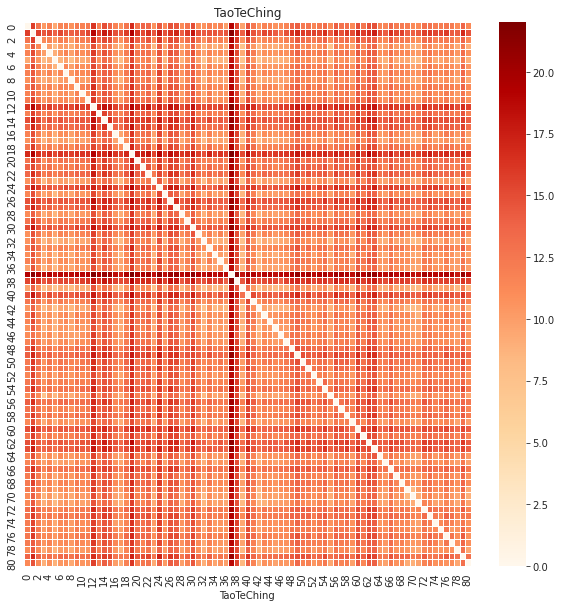

In [ ]:
dplot = distplot(dist_vals["TaoTeChing"], "TaoTeChing")
dplot.set_title("TaoTeChing")

In [ ]:
# val = pairwise_distances(X = books["Buddhism"], Y = books["TaoTeChing"], metric = "euclidean")
# distplot(val)

In [ ]:
# dist = DistanceMetric.get_metric('euclidean')
# val1 = dist.pairwise(books["Buddhism"], books["TaoTeChing"])

In [ ]:
# np.median(val.flatten())
a = []
for idx,name1 in enumerate(booknames):
  for idx2,name2 in enumerate(booknames):
    val = pairwise_distances(X = books[name1], Y = books[name2], metric = "euclidean")
    a.append(np.median(val.flatten()))

[Text(0, 0.5, 'Buddhism'),
 Text(0, 1.5, 'TaoTeChing'),
 Text(0, 2.5, 'Upanishad'),
 Text(0, 3.5, 'YogaSutra'),
 Text(0, 4.5, 'BookOfProverb'),
 Text(0, 5.5, 'BookOfEcclesiastes'),
 Text(0, 6.5, 'BookOfEccleasiasticus'),
 Text(0, 7.5, 'BookOfWisdom')]

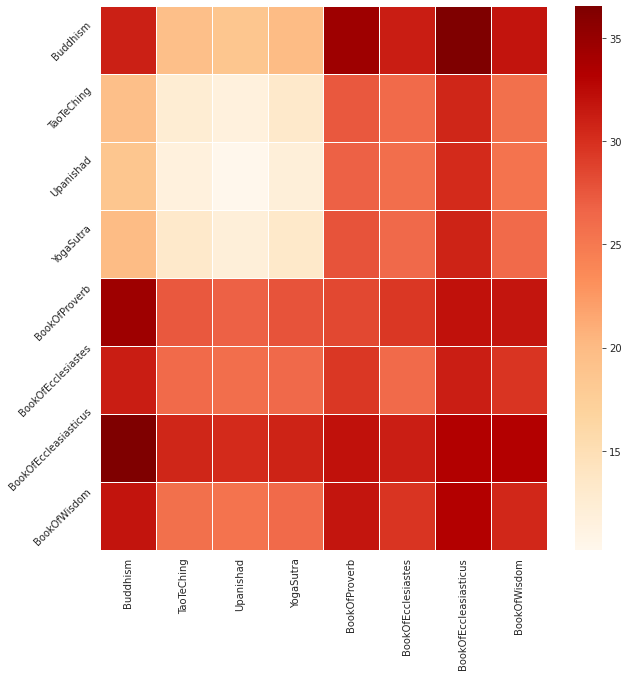

In [ ]:
medval_books = np.reshape(a,(8,8))
medplot = distplot(medval_books)
medplot.set_xticklabels(booknames, rotation = 90)
medplot.set_yticklabels(booknames, rotation = 45, ha="right")

## Preparing the dataset

In [ ]:
# Finalise X values and Y values, and then train_test_split
xdata=[]
ydata=[]
for idx,row in dataset.iterrows():
  xdata.append(row[2:].to_numpy())
  ydata.append(row[0])
ydata = [book_to_idx[name] for name in ydata]
print(len(xdata))
print(xdata)
print(ydata)

590
[array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0], dtype=object), array([0, 0, 0, ..., 0, 0, 0]

In [ ]:
labels=[]
for key in idx_to_book.keys():
  labels.append(idx_to_book[key])
print(labels)

['Buddhism', 'TaoTeChing', 'Upanishad', 'YogaSutra', 'BookOfProverb', 'BookOfEcclesiastes', 'BookOfEccleasiasticus', 'BookOfWisdom']


In [ ]:
#Train Test Split with Stratification
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state = 42, stratify = ydata)
# print(xtrain)
# print(len(xtrain))
# print(xtest)
# print(len(xtest))
# print(ytrain)
# print(len(ytrain))

### Helper Functions

In [67]:
def eval(estimator,x_test,y_test, x_train, y_train, labels):
  ytest = [idx_to_book[y] for y in y_test]
  y_pred = estimator.predict(x_test)
  ypred = [idx_to_book[y] for y in y_pred]
  print("# Classification Report")
  print(metrics.classification_report(ytest,ypred, zero_division=0, target_names = labels))
  # disp.plot()
  # plt.title('Confusion Matrix')
  # plt.show()
  score = cross_val_score(estimator, x_train, y_train, cv = 3, n_jobs = -1, scoring = "accuracy")
  print("The cross-validation accuracy score is: ", f"{score.mean():.3f}", " with standard deviation: ", f"{score.std():.3f}")

  print("# Confusion Matrix")
  disp = ConfusionMatrixDisplay.from_estimator(estimator, x_test, y_test, display_labels = labels, xticks_rotation = "vertical")

## KNN

In [ ]:
pipe_knn = make_pipeline(KNeighborsClassifier())
grid_k = {'kneighborsclassifier__n_neighbors':[3,5,7,9],'kneighborsclassifier__metric':['manhattan', 'euclidean']}
cv = GridSearchCV(pipe_knn, param_grid = grid_k, scoring = 'precision_macro', cv = 3, verbose = 1, n_jobs = 3)
cv.fit(xtrain, ytrain)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=3,
             param_grid={'kneighborsclassifier__metric': ['manhattan',
                                                          'euclidean'],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7, 9]},
             scoring='precision_macro', verbose=1)

In [75]:
# print(cv.cv_results_)
print("The optimal value for k is ", cv.best_params_)
print("The best estimator is", cv.best_estimator_)

The optimal value for k is  {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 7}
The best estimator is Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7))])


In [ ]:
pipe_knn = cv.best_estimator_
pipe_knn.fit(xtrain,ytrain)

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7))])

# Classification Report
                       precision    recall  f1-score   support

             Buddhism       0.80      0.27      0.40        15
           TaoTeChing       0.50      0.25      0.33         4
            Upanishad       0.54      0.78      0.64         9
            YogaSutra       0.50      0.17      0.25         6
        BookOfProverb       1.00      0.21      0.35        14
   BookOfEcclesiastes       0.00      0.00      0.00        24
BookOfEccleasiasticus       0.34      1.00      0.51        48
         BookOfWisdom       0.50      0.11      0.17        57

             accuracy                           0.40       177
            macro avg       0.52      0.35      0.33       177
         weighted avg       0.46      0.40      0.30       177

The cross-validation accuracy score is:  0.385  with standard deviation:  0.014
# Confusion Matrix


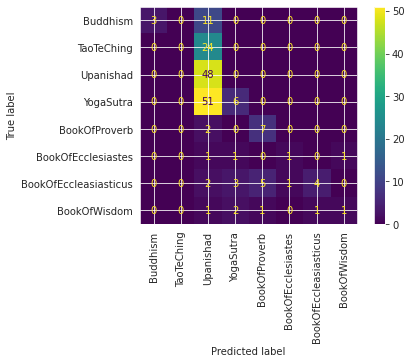

In [ ]:
eval(pipe_knn, xtest, ytest, xtrain, ytrain, labels)
# y_hat = pipe_knn.predict(xtest)
# ConfusionMatrixDisplay.from_predictions(ytest,y_hat)
# plt.show()

## Naive Bayes

In [ ]:
nb = MultinomialNB()
nbxt = [[float(x) for x in lst] for lst in xtrain]
nbyt = [float(y) for y in ytrain]
# nb.fit(xtrain, ytrain)
nb.fit(nbxt, nbyt)

In [ ]:
y_pred=nb.predict(xtest)

## Decision Tree and Random Forest

In [70]:
# cv = ShuffleSplit(n_splits=10, test_size =0.2,random_state=42)
def train_classifiers(estimator, x_train, y_train, name, params):
  grid_search = GridSearchCV(estimator=estimator,param_grid=params,cv=3,n_jobs=-1,verbose=1,scoring="precision_macro")
  grid_search.fit(x_train, y_train)
  print("The optimal hyperparameter values are:", grid_search.best_params_)
  model = grid_search.best_estimator_
  model.fit(x_train,y_train)
  return model

In [71]:
decision_tree = DecisionTreeClassifier(random_state = 42)
# train_classifiers(decision_tree_pipeline,X_train,y_train.ravel(),cv,"Decision Tree")
params_dt = {'max_depth': [2,3,4,5], 'min_samples_leaf': [2,4,6,8]}
decision_tree = train_classifiers(decision_tree, xtrain, ytrain,"Decision Tree", params = params_dt)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The optimal hyperparameter values are: {'max_depth': 5, 'min_samples_leaf': 2}


# Classification Report
                       precision    recall  f1-score   support

             Buddhism       0.33      0.13      0.19        15
           TaoTeChing       0.20      0.25      0.22         4
            Upanishad       0.42      0.89      0.57         9
            YogaSutra       0.00      0.00      0.00         6
        BookOfProverb       0.67      0.14      0.24        14
   BookOfEcclesiastes       0.94      0.62      0.75        24
BookOfEccleasiasticus       0.51      0.96      0.67        48
         BookOfWisdom       0.95      0.63      0.76        57

             accuracy                           0.62       177
            macro avg       0.50      0.45      0.42       177
         weighted avg       0.68      0.62      0.60       177

The cross-validation accuracy score is:  0.651  with standard deviation:  0.015
# Confusion Matrix


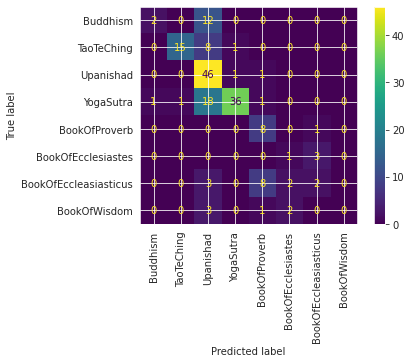

In [72]:
eval(decision_tree,xtest,ytest,xtrain,ytrain,labels)
# eval(pipe_knn, xtest, ytest, xtrain, ytrain, labels)

In [83]:
randomforest = RandomForestClassifier(random_state = 42)
params_rf = {'max_depth': [4,8,12], 'min_samples_split': [4,6,8], 'n_estimators': [20,25,30,35], 'min_samples_leaf':[2,3,4]}
rf = train_classifiers(randomforest,xtrain,ytrain,"Random Forest Classifier", params = params_rf)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
The optimal hyperparameter values are: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30}


# Classification Report
                       precision    recall  f1-score   support

             Buddhism       0.64      0.93      0.76        15
           TaoTeChing       1.00      0.25      0.40         4
            Upanishad       0.83      0.56      0.67         9
            YogaSutra       0.00      0.00      0.00         6
        BookOfProverb       1.00      0.21      0.35        14
   BookOfEcclesiastes       1.00      0.62      0.77        24
BookOfEccleasiasticus       0.66      0.85      0.75        48
         BookOfWisdom       0.75      0.89      0.82        57

             accuracy                           0.73       177
            macro avg       0.74      0.54      0.56       177
         weighted avg       0.75      0.73      0.70       177

The cross-validation accuracy score is:  0.734  with standard deviation:  0.027
# Confusion Matrix


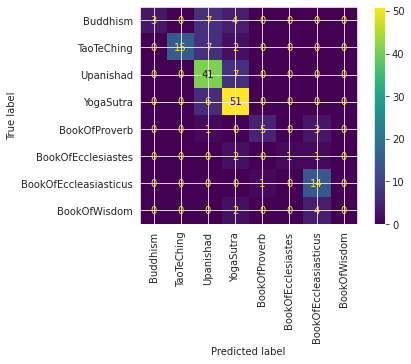

In [84]:
eval(rf,xtest,ytest,xtrain,ytrain,labels)

## ANN

In [63]:
# ANN
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier
pipe_ann = MLPClassifier(solver = 'sgd', alpha = 1e-4, max_iter=12, hidden_layer_sizes = (40,9), learning_rate_init = 0.2, random_state = 42)
params = {'alpha':[1e-3,1e-4,1e-5], 'learning_rate_init':[0.2, 0.1, 0.01]}
anxtr = [[float(x) for x in lst] for lst in xtrain]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    ann_cv = GridSearchCV(pipe_ann, param_grid = params, cv = 3, n_jobs = -1, verbose = 1, scoring = "accuracy")
    ann_cv.fit(anxtr, ytrain)
    # pipe_ann.fit(xtrain, ytrain)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [65]:
print(ann_cv.best_params_)

{'alpha': 0.001, 'learning_rate_init': 0.2}


The optimal parameters: {'alpha': 0.001, 'learning_rate_init': 0.2}
# Classification Report
                       precision    recall  f1-score   support

             Buddhism       0.00      0.00      0.00        15
           TaoTeChing       0.33      0.50      0.40         4
            Upanishad       0.30      1.00      0.46         9
            YogaSutra       0.00      0.00      0.00         6
        BookOfProverb       1.00      0.57      0.73        14
   BookOfEcclesiastes       0.89      1.00      0.94        24
BookOfEccleasiasticus       0.93      0.88      0.90        48
         BookOfWisdom       0.84      0.89      0.86        57

             accuracy                           0.77       177
            macro avg       0.54      0.61      0.54       177
         weighted avg       0.74      0.77      0.74       177

The cross-validation accuracy score is:  0.855  with standard deviation:  0.053
# Confusion Matrix


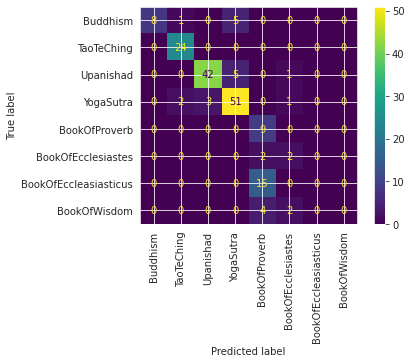

In [68]:
pipe_ann = ann_cv.best_estimator_
print("The optimal parameters:", ann_cv.best_params_)

anxt = [[float(x) for x in lst] for lst in xtest]
eval(pipe_ann, anxt, ytest, anxtr, ytrain, labels)
# y_pred = pipe_ann.predict(anxt)
# ConfusionMatrixDisplay.from_predictions(ytest, y_pred)
# plt.show()
# print(metrics.classification_report(ytest, y_pred, zero_division=0))

## **SVC**

In [ ]:
# pipe_1 = Pipeline([('scaler', MinMaxScaler()),("classifier",SVC(kernel = 'rbf',gamma=0.1, C = 1))])
pipe_1 = Pipeline([("classifier",LinearSVC(random_state=42, tol=1e-5))])
pipe_1.fit(xtrain, ytrain)

Pipeline(steps=[('classifier', LinearSVC(random_state=42, tol=1e-05))])

# Classification Report
                       precision    recall  f1-score   support

             Buddhism       0.86      0.80      0.83        15
           TaoTeChing       1.00      0.25      0.40         4
            Upanishad       0.82      1.00      0.90         9
            YogaSutra       1.00      0.67      0.80         6
        BookOfProverb       0.67      0.71      0.69        14
   BookOfEcclesiastes       0.95      0.79      0.86        24
BookOfEccleasiasticus       0.90      0.96      0.93        48
         BookOfWisdom       0.87      0.93      0.90        57

             accuracy                           0.87       177
            macro avg       0.88      0.76      0.79       177
         weighted avg       0.88      0.87      0.87       177

The cross-validation accuracy score is:  0.852  with standard deviation:  0.043
# Confusion Matrix


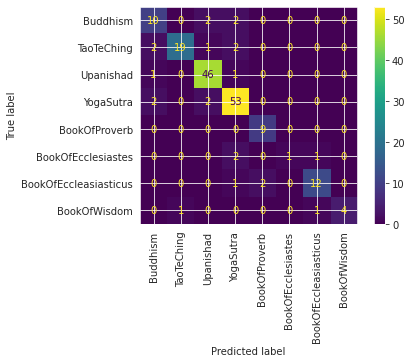

In [ ]:
eval(pipe_1, xtest, ytest, xtrain, ytrain, labels)
# y_pred=pipe_1.predict(xtest)
# ConfusionMatrixDisplay.from_predictions(ytest,y_pred)
# plt.show()